
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set analized here contains data of 10,000 movies collected from The Movie Database(TMDb), including budget, revenue, ratings, etc. Each movie was rated from 0-10. Some columns, like 'casts', contain '|' to separate multiple values. The last two columns contain '_adj' show the adjusted budget and revenue in terms of 2010, due to inflation over time. For this reason, I will use budjet_adj and revenue_adj for comparison of different movie from different years.The following questions are what I would like to find out the answers from this dataset.

>**Question 1**:Does rating have a positive correlation to revenue?

>**Question 2**:Which director's movie get the highest rating in average?

>**Question 3**:Which companies get the biggest profits(revenue_adj - budget_adj)?

>**Question 4**:Which genres are most popular over the time?

>**Question 5**:What attributes are accociated with better revenue?

In [1]:
# Import liabraries that are needed in this project

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Assess data and show a few lines of the samples
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Show numbers of entries and columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning (Drop columns that are not relevant to the questions and rows with missing values)

In [4]:
#Drop rows that are not relevant to the questions.
#Based on the questions asked in Introduction, columns like homepage, tagline, keywords, overview, runtime, production_companies,
#release_date, vote_count are not relevant, so they could be dropped
df.drop(['homepage','tagline','keywords','overview','release_date'],axis=1,inplace=True)

#Confirm changes
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

#Confirm changes
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

>Now all the entries with null values are cleaned.

In [6]:
#Overview of the cleaned datast
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 16 columns):
id                      9771 non-null int64
imdb_id                 9771 non-null object
popularity              9771 non-null float64
budget                  9771 non-null int64
revenue                 9771 non-null int64
original_title          9771 non-null object
cast                    9771 non-null object
director                9771 non-null object
runtime                 9771 non-null int64
genres                  9771 non-null object
production_companies    9771 non-null object
vote_count              9771 non-null int64
vote_average            9771 non-null float64
release_year            9771 non-null int64
budget_adj              9771 non-null float64
revenue_adj             9771 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [7]:
#Unique value of each attribute in the cleaned dataset
df.nunique()

id                      9770
imdb_id                 9770
popularity              9733
budget                   533
revenue                 4611
original_title          9510
cast                    9721
director                4504
runtime                  223
genres                  1916
production_companies    7406
vote_count              1289
vote_average              68
release_year              56
budget_adj              2549
revenue_adj             4742
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Does rating have a positive correlation to revenue?

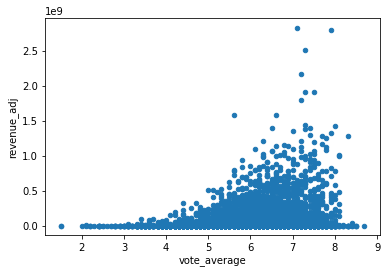

In [8]:
# Visualize the correlation of rating and revenue_adj with a scatter plot
df.plot.scatter(x='vote_average',y='revenue_adj')

>It seems that there are movies made zero revenue. Despite that, the ratings(vote_average) seems to have a positive correlations with the revenue(revenue_adj).

### Research Question 2  Which director's movie get the highest rating in average?

In [9]:
#Caculate the average rating of movies for each director
av_rating = df.groupby('director').vote_average.mean()

#Sort the ratings
av_rating.sort_values(ascending=False,inplace=True)

#Pick the top ten directors and show them
av_rating_top10 = av_rating[:10]
av_rating_top10

director
David Mallet                            8.7
Martin Scorsese|Michael Henry Wilson    8.5
Curt Morgan                             8.5
Saul Swimmer                            8.5
Jorge RamÃ­rez SuÃ¡rez                  8.4
Claude Lanzmann                         8.3
Dean Wellins                            8.3
Sam Dunn|Scot McFadyen                  8.3
Adam Curtis                             8.3
Damien Chazelle                         8.2
Name: vote_average, dtype: float64

Text(0,0.5,'Average movie ratings')

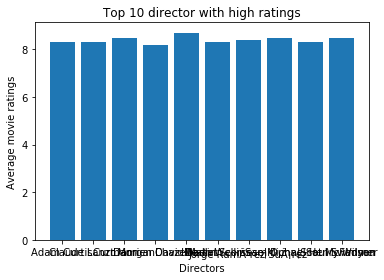

In [10]:
#Visualize the top 10 directors with bar chart
plt.bar(av_rating_top10.index,av_rating_top10)
plt.figsize = (50,50)
plt.title('Top 10 director with high ratings')
plt.xlabel('Directors')
plt.ylabel('Average movie ratings')

>The director who got the highest average rating from year to year is David Mallet, with an average rating of 8.7

### Research Question 3  What companies get the biggest profits(revenue_adj - budget_adj)?

In [11]:
#Calculate the averate profit for each company(ies)
revenue_m = df.groupby('production_companies').revenue_adj.mean()
budget_m = df.groupby('production_companies').budget_adj.mean()
profit = revenue_m - budget_m

#Sort the profit in descending order and show the top 10 list
profit.sort_values(ascending=False,inplace=True)
profit_top10 = profit[:10]
profit_top10

production_companies
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2.586237e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                            2.234714e+09
Warner Bros.|Hoya Productions                                                                                 2.128036e+09
Lucasfilm|Twentieth Century Fox Film Corporation                                                              1.770043e+09
Lucasfilm|Truenorth Productions|Bad Robot                                                                     1.718723e+09
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                      1.254446e+09
Paramount Pictures|Alfran Productions                                                                         1.246626e+09
WingNut Films|New Line Cinema                                                                                 1.214855

Text(0,0.5,'Average Benifits')

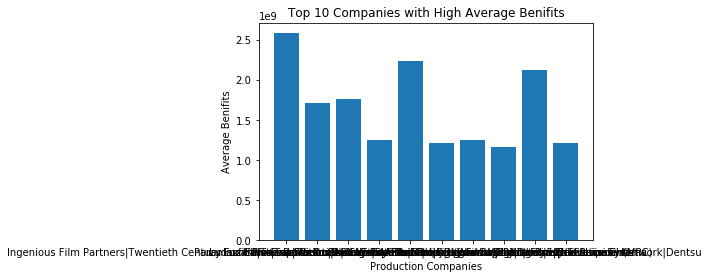

In [12]:
#Visualize the top 10 companies with bar chart
plt.bar(profit_top10.index,profit_top10)
plt.figsize = (50,50)
plt.title('Top 10 Companies with High Average Benifits')
plt.xlabel('Production Companies')
plt.ylabel('Average Benifits')

>The companies that make the best profit in average are Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment.

### Research Question 4  Which genres are most popular over the time?

In [13]:
#Calculate the average popularity for each genres group
pop = df.groupby('genres').popularity.mean()

#Sort the popularity in descending order, and show the top 10 list.
pop.sort_values(ascending=False,inplace=True)
pop_top10 = pop[:10]
pop_top10

genres
Adventure|Science Fiction|Thriller                   13.112507
Adventure|Drama|Science Fiction                      12.699699
Science Fiction|Adventure|Thriller                   10.739009
Action|Thriller|Science Fiction|Mystery|Adventure     9.363643
Western|Drama|Adventure|Thriller                      9.110700
Adventure|Family|Animation|Action|Comedy              8.691294
Science Fiction|Action|Thriller|Adventure             8.654359
History|Drama|Thriller|War                            8.110711
Drama|Adventure|Science Fiction                       7.667400
Fantasy|Action|Horror                                 7.031452
Name: popularity, dtype: float64

Text(0,0.5,'Average Popularity')

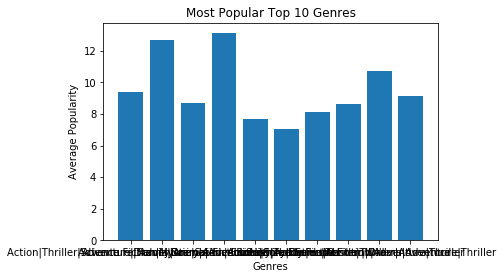

In [14]:
#Visualize the top 10 genres with bar chart
plt.bar(pop_top10.index,pop_top10)
plt.figsize = (50,50)
plt.title('Most Popular Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Average Popularity')

>The most popular genres of movies are those in adventure, science fiction and thriller.

### Research Question 5  What attributes are associated with better revenue?

>Get the correlation between revenues and other attributes, like budget, popularity, average votes, etc. We could first query out the entries with revenue above median

In [15]:
#Query the entries with revenue_adj above the average
rev_m = df['revenue_adj'].mean()
df_h = df.query('revenue_adj > @rev_m')

Text(0,0.5,'Adjusted Budget')

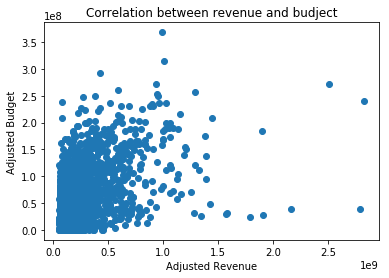

In [16]:
#Scatter plot between revenue_adj and budjet_adj
plt.scatter(df_h['revenue_adj'], df_h['budget_adj'])
plt.title('Correlation between revenue and budject')
plt.xlabel('Adjusted Revenue')
plt.ylabel('Adjusted Budget')

Text(0,0.5,'Popularity')

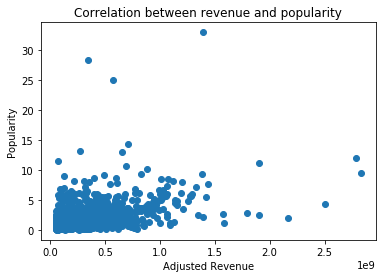

In [17]:
#Scatter plot between revenue_adj and popularity
plt.scatter(df_h['revenue_adj'], df_h['popularity'])
plt.title('Correlation between revenue and popularity')
plt.xlabel('Adjusted Revenue')
plt.ylabel('Popularity')

Text(0,0.5,'Average Votes')

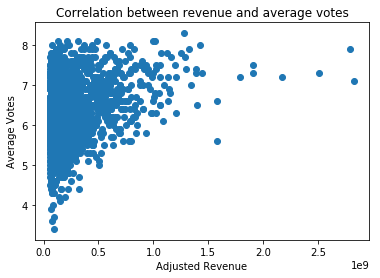

In [18]:
#Scatter plot between revenue_adj and average votes
plt.scatter(df_h['revenue_adj'], df_h['vote_average'])
plt.title('Correlation between revenue and average votes')
plt.xlabel('Adjusted Revenue')
plt.ylabel('Average Votes')

Text(0,0.5,'Runtime')

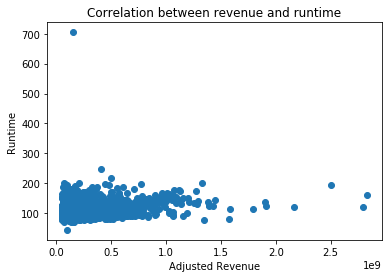

In [19]:
#Scatter plot between revenue_adj and run time
plt.scatter(df_h['revenue_adj'], df_h['runtime'])
plt.title('Correlation between revenue and runtime')
plt.xlabel('Adjusted Revenue')
plt.ylabel('Runtime')

Text(0,0.5,'Vote Counts')

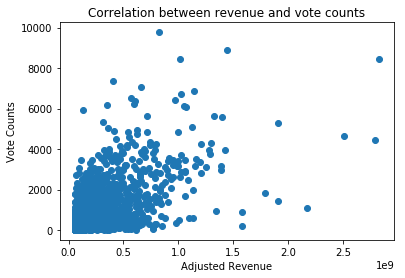

In [20]:
#Scatter plot between revenue_adj and vote counts
plt.scatter(df_h['revenue_adj'], df_h['vote_count'])
plt.title('Correlation between revenue and vote counts')
plt.xlabel('Adjusted Revenue')
plt.ylabel('Vote Counts')

>From the scatter plots, it is easy to see that budget, average rating and vote counts are the most associated with high revenues.

<a id='conclusions'></a>
## Conclusions

> There are three conclusions that I could draw from the analysis process and results:

>***1)*** The director who wins the highest rating in average from all the movie s/he made is David Mallet.

>***2)*** The production companies that produce movies with the highest profit in average are Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment.Here profit is calcualte as revenue minus budget. 

>***3)*** The most popular genres of movies are adventure, science fiction and thriller.

>***4)*** People's votes have a positive correlation with revenue

>***5)*** Budget, average rating and vote counts have the most contribution to high revenues.

>Different groups of people could benefit from this analysis results. For example, Audience could pick which director's movie to watch. Movie makers could see which type of movies has potential to get high popularity. Last but not least, invester will know which production company that they invest will most likely bring them considerable profit.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0